### Note that this is not the file containing the best performing model, but rather serves as a demonstration of how the dataset was loaded, how making the model, training, and evaluating was done if you would like to run it yourself. The performance will be far from our final accuracy since this is only a demonstration and trains each model for 10 epochs.

### In order to run this notebook, you must download the Stanford University Car Detection Dataset from Kaggle at this link: https://www.kaggle.com/datasets/jutrera/stanford-car-dataset-by-classes-folder?resource=download and replace all instances containing file directories with your own. 

In [1]:
from google.colab import drive, files
import pandas as pd
import numpy as np
import os
from PIL import Image
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
device_name = tf.test.gpu_device_name()

## Load the Dataset

In [11]:
#Replace these directories with the path to the zip folder and the path you want the dataset saved.
!unzip '.zip folder' -d 'directory you want it saved to'

In [4]:
#Replace the directories with the path to your train and test folders from the downloaded dataset.
TypeTrain = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Deep Learning/SeparatedByType/car_data/car_data/train', color_mode='grayscale', labels='inferred', validation_split=0.2,
    subset='training', shuffle=True,
    seed=100,
    image_size=(224, 224),
    batch_size=32,
)
TypeVal = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Deep Learning/SeparatedByType/car_data/car_data/train', color_mode='grayscale', labels='inferred', validation_split=0.2,
    subset='validation', shuffle=True,
    seed=100,
    image_size=(224, 224),
    batch_size=32,
)
TypeTest = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Deep Learning/SeparatedByType/car_data/car_data/test', color_mode='grayscale', labels='inferred',
    image_size=(224, 224), shuffle=False,
    batch_size=32,
)

Found 11289 files belonging to 9 classes.
Using 9032 files for training.
Found 11289 files belonging to 9 classes.
Using 2257 files for validation.
Found 3747 files belonging to 9 classes.


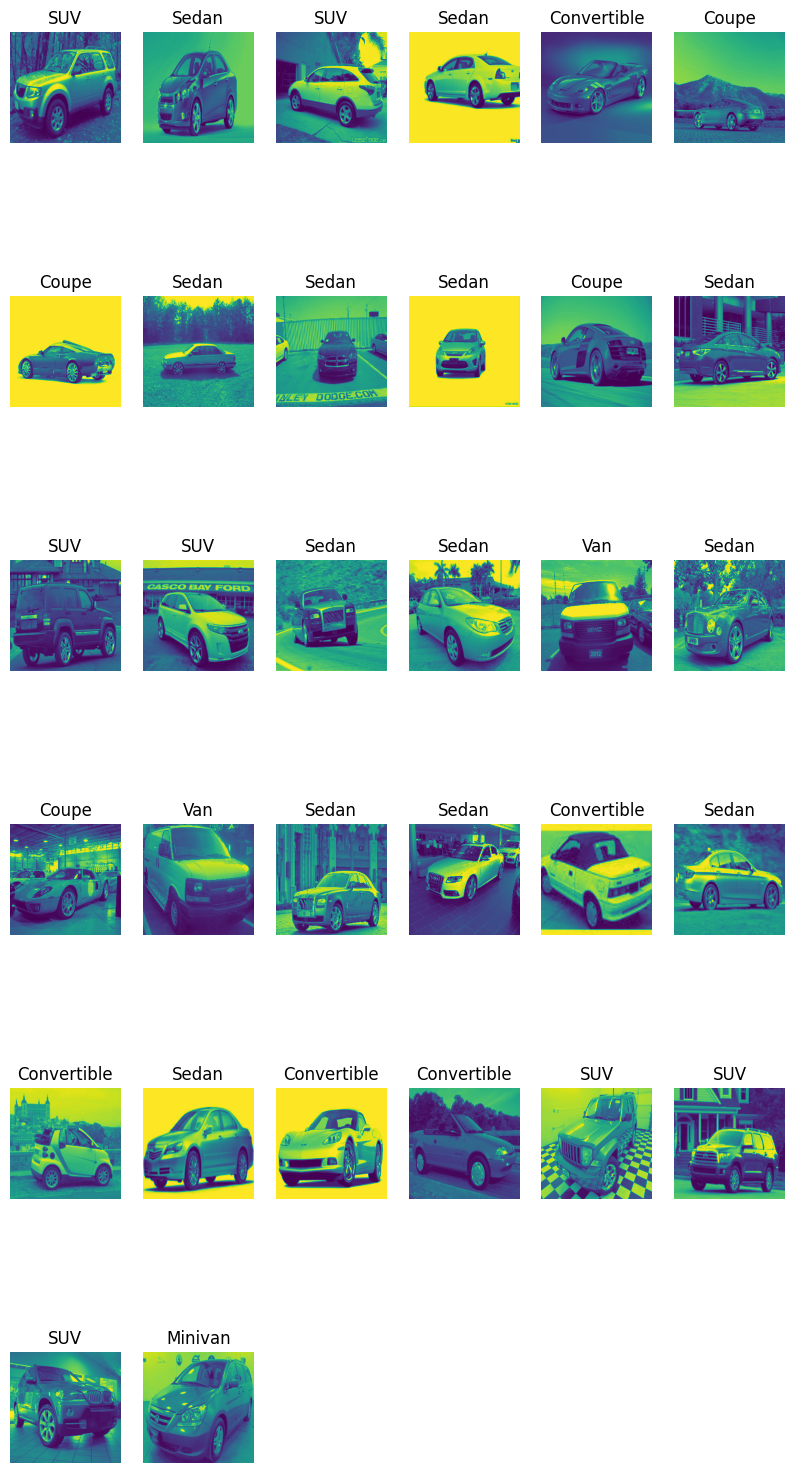

In [13]:
#Make sure our split kept our data labeled correctly.
plt.figure(figsize=(10, 20))
for images, labels in TypeVal.take(1):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(TypeVal.class_names[labels[i]])
        plt.axis("off")

## Define the Model

In [5]:
#Data augmentation
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomTranslation(0.15,0.15)
])

In [15]:
#Make the model.
with tf.device(device_name):
  Type_model = models.Sequential()
  Type_model.add(data_augmentation)
  Type_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)))
  Type_model.add(layers.BatchNormalization())
  Type_model.add(layers.MaxPooling2D((2, 2)))
  Type_model.add(layers.Dropout(0.25))

  Type_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  Type_model.add(layers.BatchNormalization())
  Type_model.add(layers.MaxPooling2D((2, 2)))
  Type_model.add(layers.Dropout(0.25))

  Type_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  Type_model.add(layers.BatchNormalization())
  Type_model.add(layers.MaxPooling2D((2, 2)))
  Type_model.add(layers.Dropout(0.25))

  Type_model.add(layers.Flatten())
  Type_model.add(layers.Dense(512, activation='relu'))
  Type_model.add(layers.BatchNormalization())
  Type_model.add(layers.Dropout(0.5))
  Type_model.add(layers.Dense(9, activation='softmax'))

In [16]:
#Create callbacks for saving weights.
#Replace the directory with the path you would like to save these weights.
from keras.callbacks import ModelCheckpoint
Type_callbacks = [
    ModelCheckpoint(filepath="/content/drive/MyDrive/Deep Learning/Demos/BetterModel", 
                             monitor='val_accuracy', verbose=1, 
                             save_best_only=True, mode='max')]

## Run Training

In [17]:
#Train Model
with tf.device(device_name):
  Type_model.compile(optimizer=tf.keras.optimizers.Adam(3e-3),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Type_hist = Type_model.fit(TypeTrain, epochs=10, callbacks=Type_callbacks, validation_data=TypeVal)

Epoch 1/10
283/283 [==============================] - ETA: 0s - loss: 2.5703 - accuracy: 0.1895
Epoch 1: val_accuracy improved from -inf to 0.25565, saving model to /content/drive/MyDrive/Deep Learning/Demos/BetterModel


283/283 [==============================] - 2017s 7s/step - loss: 2.5703 - accuracy: 0.1895 - val_loss: 2.1081 - val_accuracy: 0.2556
Epoch 2/10
283/283 [==============================] - ETA: 0s - loss: 2.1906 - accuracy: 0.2098
Epoch 2: val_accuracy did not improve from 0.25565
283/283 [==============================] - 1996s 7s/step - loss: 2.1906 - accuracy: 0.2098 - val_loss: 2.1122 - val_accuracy: 0.2034
Epoch 3/10
283/283 [==============================] - ETA: 0s - loss: 2.1224 - accuracy: 0.2211
Epoch 3: val_accuracy did not improve from 0.25565
283/283 [==============================] - 2003s 7s/step - loss: 2.1224 - accuracy: 0.2211 - val_loss: 2.6230 - val_accuracy: 0.1475
Epoch 4/10
283/283 [==============================] - ETA: 0s - loss: 2.0860 - accuracy: 0.2291
Epoch 4: val_accuracy did not improve from 0.25565
283/283 [==============================] - 1997s 7s/step - loss: 2.0860 - accuracy: 0.2291 - val_loss: 2.3770 - val_accuracy: 0.2286
Epoch 5/10
283/283 [=======

283/283 [==============================] - 2009s 7s/step - loss: 1.9606 - accuracy: 0.2566 - val_loss: 1.9941 - val_accuracy: 0.2592
Epoch 10/10
283/283 [==============================] - ETA: 0s - loss: 1.9360 - accuracy: 0.2682
Epoch 10: val_accuracy did not improve from 0.25919
283/283 [==============================] - 1995s 7s/step - loss: 1.9360 - accuracy: 0.2682 - val_loss: 2.1098 - val_accuracy: 0.2317


In [18]:
Type_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 224, 224, 1)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      320       
                                                                 
 batch_normalization_4 (Batc  (None, 222, 222, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)     

## Evaluate and Display Results

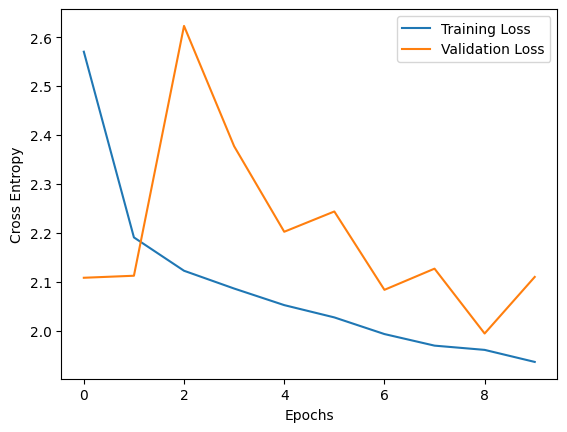

In [19]:
#Plot the loss from training.
plt.plot(Type_hist.history['loss'], label='Training Loss')
plt.plot(Type_hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy')
plt.savefig('model_training_history')
plt.show()

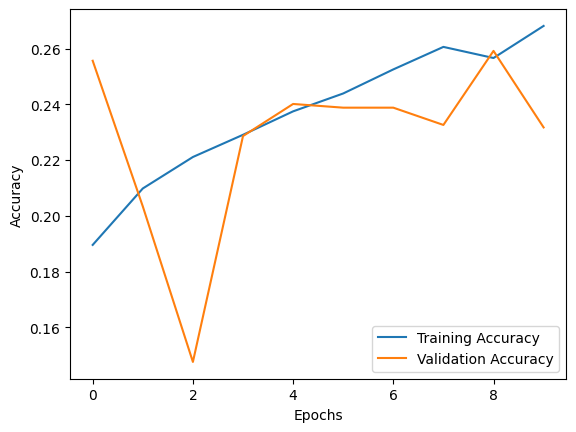

In [20]:
#Plot for accuracy.
plt.plot(Type_hist.history['accuracy'], label='Training Accuracy')
plt.plot(Type_hist.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('model_training_history')
plt.show()

In [21]:
#Load the weights that were saved from callbacks.
#Replace this directory with the same directory you used when creating callbacks.
Type_model.load_weights('/content/drive/MyDrive/Deep Learning/Demos/BetterModel')

In [22]:
#Evaluate the model on the test set.
result = Type_model.evaluate(TypeTest)

118/118 [==============================] - 852s 7s/step - loss: 2.0240 - accuracy: 0.2575


In [23]:
#Make predictions from test set.
Type_predictions = Type_model.predict(TypeTest)

118/118 [==============================] - 187s 2s/step


In [ ]:
#Make the ground truths of the test set.
file_paths = TypeTest.file_paths
print(file_paths)
groundTruths = []
testImages = []
for path in file_paths:
  imgFile, groundTruth, img = path.rsplit('/', 2)
  groundTruths.append(groundTruth)
  testImages.append(img)

In [25]:
#Index the ground truths to compare with the highest index from the predictions.
testTruths = []
for i in range(len(groundTruths)):
  testTruths.append(TypeTest.class_names.index(groundTruths[i]))

preds = np.argmax (Type_predictions, axis = 1)
tests = np.array(testTruths)
print(preds)
print(tests)

[6 6 2 ... 6 6 2]
[0 0 0 ... 8 8 8]


In [26]:
#Turn our output percentages into our overall class label prediction.
predicted_labels = []
for i in range(len(preds)):
  predicted_labels.append(TypeTest.class_names[preds[i]])
#Uncomment these if you would like to see a comparison of predictions and ground truths.
#print(predicted_labels)
#print(groundTruths)

### Confusion Matrix

([<matplotlib.axis.YTick at 0x7f1bdaa621a0>,
 [Text(0, 0, 'Cab'),
  Text(0, 1, 'Convertible'),
  Text(0, 2, 'Coupe'),
  Text(0, 3, 'Hatchback'),
  Text(0, 4, 'Minivan'),
  Text(0, 5, 'SUV'),
  Text(0, 6, 'Sedan'),
  Text(0, 7, 'Van'),
  Text(0, 8, 'Wagon')])

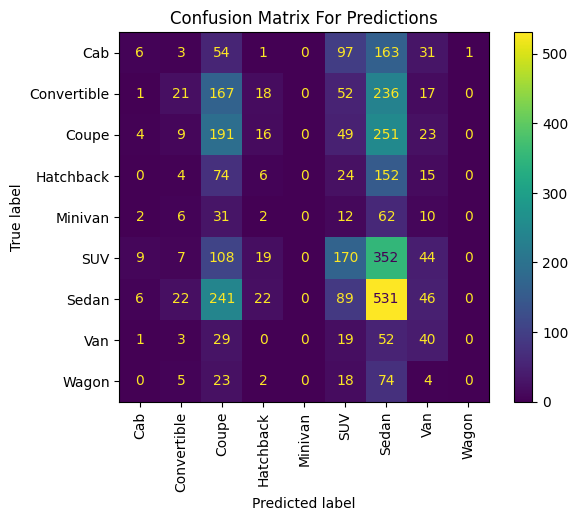

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusionMat = confusion_matrix(tests, preds)
dispConfMat = metrics.ConfusionMatrixDisplay(confusion_matrix = confusionMat)
dispConfMat.plot()
plt.title('Confusion Matrix For Predictions')
plt.xticks(np.arange(9), TypeTest.class_names, rotation=90)
plt.yticks(np.arange(9), TypeTest.class_names)

### Classification Report

In [28]:
from sklearn.metrics import classification_report
print(classification_report(tests, preds))

              precision    recall  f1-score   support

           0       0.21      0.02      0.03       356
           1       0.26      0.04      0.07       512
           2       0.21      0.35      0.26       543
           3       0.07      0.02      0.03       275
           4       0.00      0.00      0.00       125
           5       0.32      0.24      0.27       709
           6       0.28      0.55      0.38       957
           7       0.17      0.28      0.21       144
           8       0.00      0.00      0.00       126

    accuracy                           0.26      3747
   macro avg       0.17      0.17      0.14      3747
weighted avg       0.23      0.26      0.21      3747



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
#Type_model.save('/content/drive/MyDrive/Deep Learning/SavedModels/VehicleTypeModelDemo.h5')

## Compare With Simple (Base) Model

#### Same thing with base model.

In [6]:
with tf.device(device_name):
  simpleModel = models.Sequential()
  simpleModel.add(data_augmentation)
  simpleModel.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,1)))
  simpleModel.add(layers.MaxPooling2D((2,2)))
  simpleModel.add(layers.Conv2D(64, (3, 3), activation='relu'))
  simpleModel.add(layers.MaxPooling2D((2,2)))
  simpleModel.add(layers.Conv2D(64, (3, 3), activation='relu'))
  simpleModel.add(layers.Flatten())
  simpleModel.add(layers.Dense(64, activation='relu'))
  simpleModel.add(layers.Dropout(0.5))
  simpleModel.add(layers.Dense(9, activation='softmax'))

In [7]:
from keras.callbacks import ModelCheckpoint
simple_callbacks = [
    ModelCheckpoint(filepath="/content/drive/MyDrive/Deep Learning/Demos/BaseModel", 
                             monitor='val_accuracy', verbose=1, 
                             save_best_only=True, mode='max')]

In [8]:
with tf.device(device_name):
  simpleModel.compile(optimizer=tf.keras.optimizers.Adam(1e-3),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

simple_hist = simpleModel.fit(TypeTrain, epochs=10, callbacks=simple_callbacks, validation_data=TypeVal)

Epoch 1/10
283/283 [==============================] - ETA: 0s - loss: 5.3956 - accuracy: 0.2445
Epoch 1: val_accuracy improved from -inf to 0.25831, saving model to /content/drive/MyDrive/Deep Learning/Demos/BaseModel


283/283 [==============================] - 1039s 3s/step - loss: 5.3956 - accuracy: 0.2445 - val_loss: 2.1024 - val_accuracy: 0.2583
Epoch 2/10
282/283 [============================>.] - ETA: 0s - loss: 2.0751 - accuracy: 0.2582
Epoch 2: val_accuracy did not improve from 0.25831
283/283 [==============================] - 45s 154ms/step - loss: 2.0750 - accuracy: 0.2581 - val_loss: 2.0427 - val_accuracy: 0.2583
Epoch 3/10
283/283 [==============================] - ETA: 0s - loss: 2.0318 - accuracy: 0.2581
Epoch 3: val_accuracy did not improve from 0.25831
283/283 [==============================] - 43s 150ms/step - loss: 2.0318 - accuracy: 0.2581 - val_loss: 2.0096 - val_accuracy: 0.2583
Epoch 4/10
283/283 [==============================] - ETA: 0s - loss: 2.0089 - accuracy: 0.2581
Epoch 4: val_accuracy did not improve from 0.25831
283/283 [==============================] - 45s 154ms/step - loss: 2.0089 - accuracy: 0.2581 - val_loss: 1.9920 - val_accuracy: 0.2583
Epoch 5/10
282/283 [====

In [9]:
simpleModel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)       

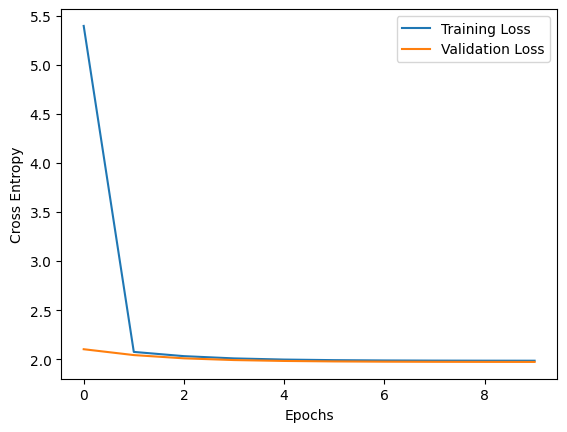

In [10]:
#Plot the loss from training.
plt.plot(simple_hist.history['loss'], label='Training Loss')
plt.plot(simple_hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy')
plt.savefig('model_training_history')
plt.show()

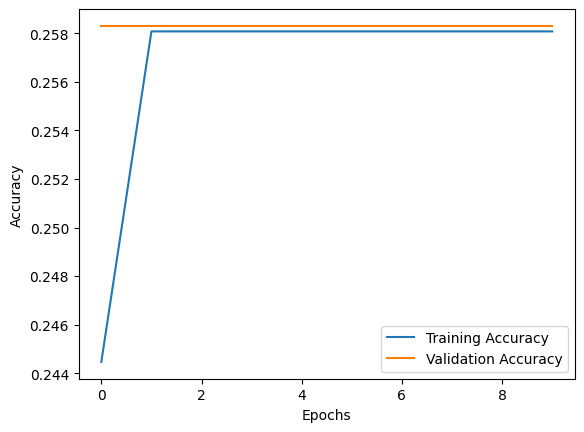

In [11]:
plt.plot(simple_hist.history['accuracy'], label='Training Accuracy')
plt.plot(simple_hist.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('model_training_history')
plt.show()

In [12]:
#Load the weights that were saved from callbacks.
#Replace this directory with the same directory you used when creating callbacks.
simpleModel.load_weights('/content/drive/MyDrive/Deep Learning/Demos/BaseModel')

In [13]:
#Evaluate the model on the test set.
result = simpleModel.evaluate(TypeTest)

118/118 [==============================] - 401s 3s/step - loss: 2.1053 - accuracy: 0.2554


In [14]:
#Make predictions from test set.
simple_predictions = simpleModel.predict(TypeTest)

118/118 [==============================] - 13s 114ms/step


In [ ]:
#Make the ground truths of the test set.
file_paths = TypeTest.file_paths
groundTruths = []
testImages = []
for path in file_paths:
  imgFile, groundTruth, img = path.rsplit('/', 2)
  groundTruths.append(groundTruth)
  testImages.append(img)

In [16]:
#Index the ground truths to compare with the highest index from the predictions.
testTruths = []
for i in range(len(groundTruths)):
  testTruths.append(TypeTest.class_names.index(groundTruths[i]))

preds = np.argmax (simple_predictions, axis = 1)
tests = np.array(testTruths)
print(preds)
print(tests)

[6 6 6 ... 6 6 6]
[0 0 0 ... 8 8 8]


In [17]:
#Turn our output percentages into our overall class label prediction.
predicted_labels = []
for i in range(len(preds)):
  predicted_labels.append(TypeTest.class_names[preds[i]])
#Uncomment these if you would like to see a comparison of predictions and ground truths.
#print(predicted_labels)
#print(groundTruths)

([<matplotlib.axis.YTick at 0x7fb17c30bb20>,
 [Text(0, 0, 'Cab'),
  Text(0, 1, 'Convertible'),
  Text(0, 2, 'Coupe'),
  Text(0, 3, 'Hatchback'),
  Text(0, 4, 'Minivan'),
  Text(0, 5, 'SUV'),
  Text(0, 6, 'Sedan'),
  Text(0, 7, 'Van'),
  Text(0, 8, 'Wagon')])

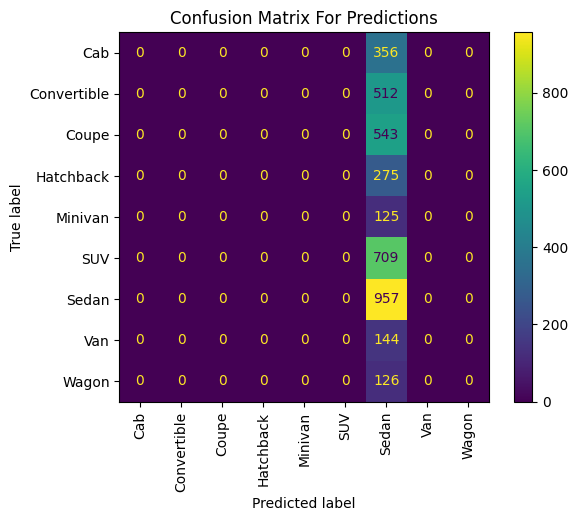

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusionMat = confusion_matrix(tests, preds)
dispConfMat = metrics.ConfusionMatrixDisplay(confusion_matrix = confusionMat)
dispConfMat.plot()
plt.title('Confusion Matrix For Predictions')
plt.xticks(np.arange(9), TypeTest.class_names, rotation=90)
plt.yticks(np.arange(9), TypeTest.class_names)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(tests, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       356
           1       0.00      0.00      0.00       512
           2       0.00      0.00      0.00       543
           3       0.00      0.00      0.00       275
           4       0.00      0.00      0.00       125
           5       0.00      0.00      0.00       709
           6       0.26      1.00      0.41       957
           7       0.00      0.00      0.00       144
           8       0.00      0.00      0.00       126

    accuracy                           0.26      3747
   macro avg       0.03      0.11      0.05      3747
weighted avg       0.07      0.26      0.10      3747



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
